## Small Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

Here are the classes and 10 random Images from Each.
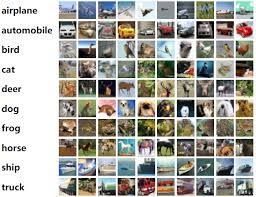

- Model is not working properly: 
### Still Very-Good for learning and revising: Might be datastes have some updates I am not adressing it here


In [61]:
#Importing libraries 

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [62]:
#Loading Dataset

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

print(X_test.shape)
X_train.shape

(10000, 32, 32, 3)


(50000, 32, 32, 3)

##### Note:
Dataset size: 60K || 32 x 32 coloured images with 3 rgb channels 
- https://en.wikipedia.org/wiki/Channel_(digital_image)

In [ ]:
X_train[:5]

In [63]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [64]:
#Coverting y_train to 1D Array from 2D Array
y_train = y_train.reshape(-1,)
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [65]:
y_test = y_test.reshape(-1)

In [66]:
#RE_Naming y_train from assigned-number to name (observed alphabetically)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[9]

'truck'

In [67]:
#Define a Funntion to easliy plot the images frim traing or testing data sets
def plot_sample(X,y, index):
    plt.figure(figsize = (4,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])    

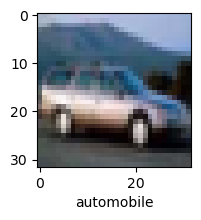

In [68]:
plot_sample(X_train,y_train,4)

# Normalizing the training data
Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [89]:
X_train = X_train/255
y_train = y_train/255

## Building Simple ANN for image classification

In [103]:
ANN = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), 
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(10, activation = 'softmax')
    ])

ANN.compile(optimizer ='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ANN.fit(X_train, y_train, epochs= 1)

1563/1563 [==============================] - 123s 78ms/step - loss: 0.1001 - accuracy: 0.0999


#### Evaluating ANN : Classification report and Confususion metrics

In [111]:
ANN.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 6686.7783 - accuracy: 0.1000


[6686.7783203125, 0.10000000149011612]

In [110]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ANN.predict(X_test) 
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes)

SyntaxError: incomplete input (2855005107.py, line 6)

In [112]:
y_pred_classes = [np.argmax(element) for element in y_pred]  #study about np.argmax
y_pred_classes[20:40]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Lets build convolutional neural network [CNN Model]

In [94]:
 cnn = models.Sequential([
     #CNN layers 
     layers.Conv2D(filters= 32, kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)),
     layers.MaxPooling2D((2,2)),
     
     # Dense layers
     layers.Flatten(),
     layers.Dense(64, activation = 'relu'),
     layers.Dense(10, activation= 'softmax')
 ])
    
cnn.compile(optimizer = 'adam',
           loss='sparse_categorical_crossentropy',
           metrics= ['accuracy'])

cnn.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.0121 - accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1361e-07 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0374e-07 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 36s 23ms/step - loss: 6.6648e-08 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 35s 23ms/step - loss: 1.7281e-08 - accuracy: 0.1000


## Model Evaluation

In [95]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 66324.6797 - accuracy: 0.1000


[66324.6796875, 0.10000000149011612]

In [96]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\Faizan_Shakeel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Faizan_Shakeel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Faizan_Shakeel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
y_pred_classes[25:30]

[0, 0, 0, 0, 0]

In [101]:
y_test[25:30]

array([2, 4, 0, 9, 6], dtype=uint8)

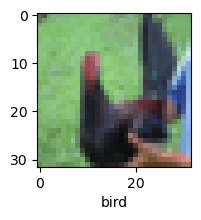

In [102]:
plot_sample(X_test,y_test, 25)

#### Remarks:
##### Just learned how to emplement ANN and CNN layers 
# Problem: Might be datastes have some updates I am not adressing it here